# Practico 4

In [1]:
from random import random

def var_rech(probs : list):
    ''' implementacion usando el metodo de rechazo
    '''
    ret = None
    while ret is None:
        y = int(random() * 10) 
        valid = random() < probs[y] / max(probs)
        ret = y + 1 if valid else None
    return ret

def var_tinv(probs : dict):
    ''' Implementacion usando transformacion invertida 
    '''
    u = random()
    f = 0
    for k, v in probs.items():
        f += v
        if u <= f:
            return k

def _gen_urna(probs):
    res = []
    for i in range(len(probs)):
        res += [i+1]*int(probs[i]*100)
    return res

def var_urna(urna : list):
    ''' Implementacion usando el metodo de la variable invertida
    '''
    u = int(random() * 100)
    return urna[u]

In [6]:
import matplotlib.pyplot as plt
from random import seed
from time import perf_counter

def get_probs(g, nsim, *args):
    seed(1811)
    acc = {}

    start = perf_counter()
    for _ in range(nsim):
        r = g(*args)
        acc[r] = 1 + acc.get(r, 0)

    end = perf_counter()

    perf = end - start
    acc = { k:v/nsim for k, v in acc.items() }
    acc = dict(sorted(acc.items()))
    return acc, perf

def plot_probs(vars, nsim):
    i = -1
    for n, g, v in vars:
        print(75*'-')
        print(n)
        
        acc, perf = get_probs(g, nsim, v)
        
        print('Got:\t ', acc)
        print(f'Perf:\t {perf:.5}ms')
        
        x_axis = list(map(lambda x: x + 0.3*i, acc.keys()))
        y_axis = acc.values()
        plt.bar(x_axis,y_axis, 0.3, label=n)
        
        i += 1

def plot_expected(probs):
    x_expected = []
    y_expected = []
    for i in range(len(probs)):
        for j in [-1,1]:
            x_expected.append(i+1+0.5*j)
            y_expected.append(probs[i])
    return x_expected, y_expected

---------------------------------------------------------------------------
Rechazo   
Got:	  {1: 0.1153, 2: 0.1361, 3: 0.0846, 4: 0.0828, 5: 0.1206, 6: 0.0955, 7: 0.095, 8: 0.0768, 9: 0.1061, 10: 0.0872}
Perf:	 0.014323ms
---------------------------------------------------------------------------
Invertida 
Got:	  {1: 0.1142, 2: 0.1413, 3: 0.0921, 4: 0.0755, 5: 0.1194, 6: 0.0917, 7: 0.0916, 8: 0.0707, 9: 0.1114, 10: 0.0921}
Perf:	 0.0083987ms
---------------------------------------------------------------------------
Urna      
Got:	  {1: 0.1099, 2: 0.1405, 3: 0.096, 4: 0.078, 5: 0.1177, 6: 0.097, 7: 0.0928, 8: 0.0748, 9: 0.1053, 10: 0.088}
Perf:	 0.0057892ms


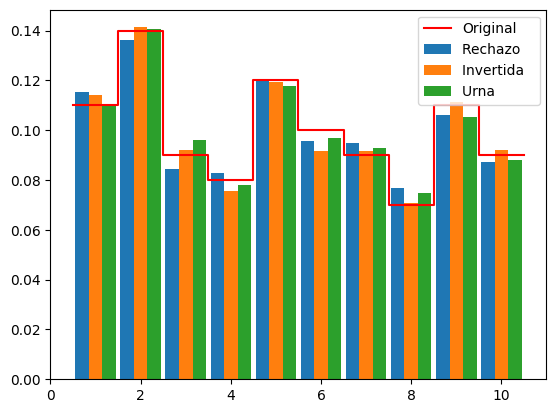

In [7]:
P = [0.11, 0.14, 0.09, 0.08, 0.12, 0.10, 0.09, 0.07, 0.11, 0.09]
p_idx = { k: v for k, v in zip(range(1,len(P)+1),P)}
sort = sorted((p_idx.items()), key = lambda x: x[1], reverse=True)
P_ORD = dict(sort)

vars = [
    ('Rechazo   ',var_rech, P), 
    ('Invertida ',var_tinv, P_ORD),
    ('Urna      ',var_urna, _gen_urna(P)),
    ]

exp_x, exp_y = plot_expected(P)
plt.plot(exp_x, exp_y,color='red', label="Original")

plot_probs(vars, 10_000)

plt.legend()
plt.show()